In [51]:
import os

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread

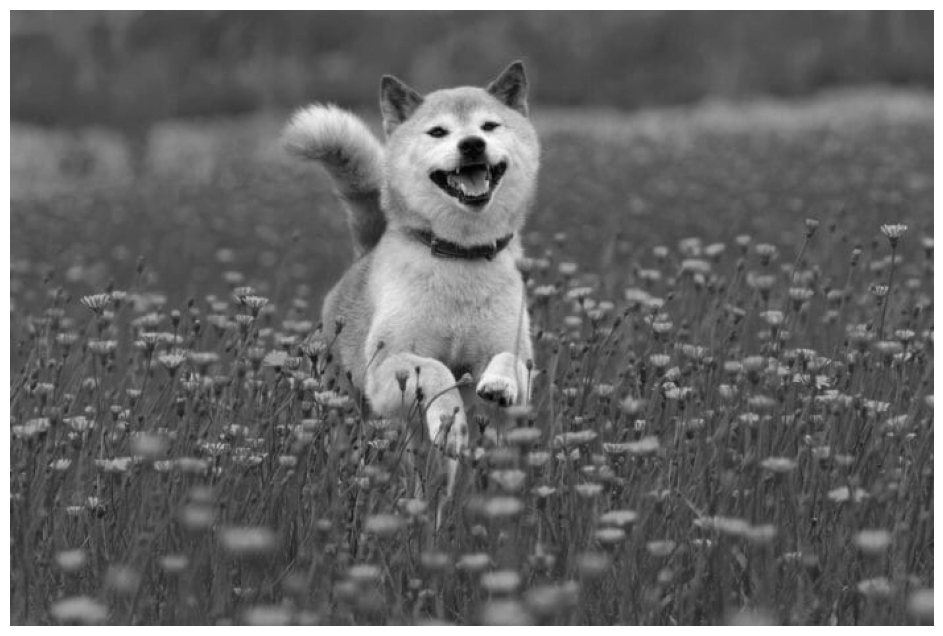

In [52]:
plt.rcParams["figure.figsize"] = [16, 8]
A = imread(os.getcwd() + "/dog.jpg")
X = np.mean(A, 2)
img = plt.imshow(X)
img.set_cmap("gray")
plt.axis("off")
plt.show()

# Es 1

In [37]:
u, s, vt = np.linalg.svd(X, full_matrices=False)
X.shape, u.shape, vt.shape, s.shape

((467, 700), (467, 467), (467, 700), (467,))

# Es 2

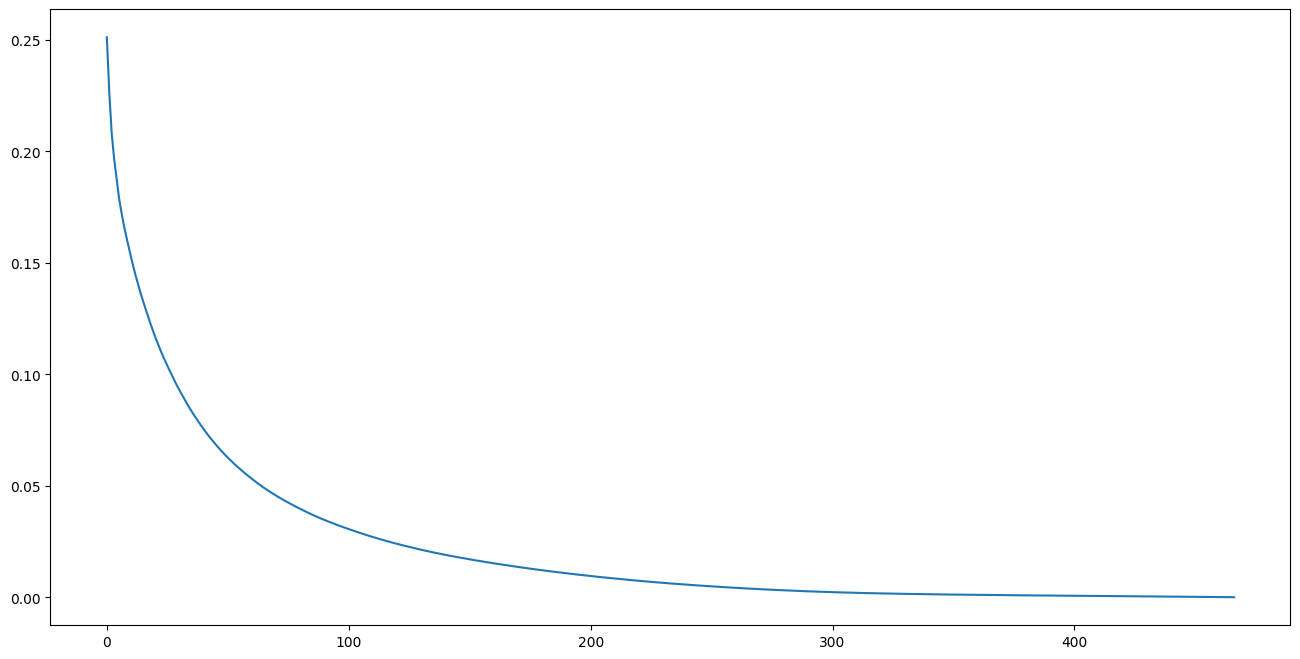

In [53]:
u, s, vt = np.linalg.svd(X)
v = vt.T
x = X

def frob_norm(m): return np.sqrt(np.sum(np.square(m)))

err = list()
for i in range(1, min(x.shape) + 1):
    sigma = np.zeros(x.shape)
    for j in range(i): sigma[j][j] = s[j]
    x_rec = u @ sigma @ vt
    err.append(frob_norm(x - x_rec) / frob_norm(x))
plt.plot(err)

In [58]:
x @ v[:, -5] # the last cols of v compose the null space of x

array([ 2.84217094e-14,  3.05533376e-13, -1.63424829e-13,  1.63424829e-13,
        8.52651283e-14,  9.94759830e-14, -1.13686838e-13,  1.42108547e-14,
       -3.55271368e-14,  1.42108547e-14, -1.06581410e-13, -1.42108547e-13,
       -4.26325641e-14,  2.13162821e-14, -2.84217094e-14,  2.13162821e-14,
       -2.20268248e-13, -1.20792265e-13,  0.00000000e+00, -1.06581410e-13,
       -7.10542736e-14, -1.56319402e-13,  1.91846539e-13, -9.94759830e-14,
       -8.52651283e-14, -3.55271368e-14,  5.68434189e-14, -2.13162821e-14,
        1.42108547e-14,  7.10542736e-15, -9.94759830e-14, -8.52651283e-14,
       -8.17124146e-14, -1.42108547e-14, -4.97379915e-14,  6.39488462e-14,
        4.26325641e-14,  0.00000000e+00, -4.97379915e-14,  2.84217094e-14,
       -4.26325641e-14, -4.26325641e-14,  4.97379915e-14,  5.68434189e-14,
        4.97379915e-14,  4.26325641e-14, -2.84217094e-14,  1.13686838e-13,
        1.42108547e-13, -1.42108547e-14,  7.10542736e-15, -7.10542736e-15,
       -2.13162821e-14,  

In [63]:
np.linalg.norm(u[:, 0]), np.linalg.norm(v[:, 0])

(0.9999999999999998, 1.0000000000000002)

# Es 2

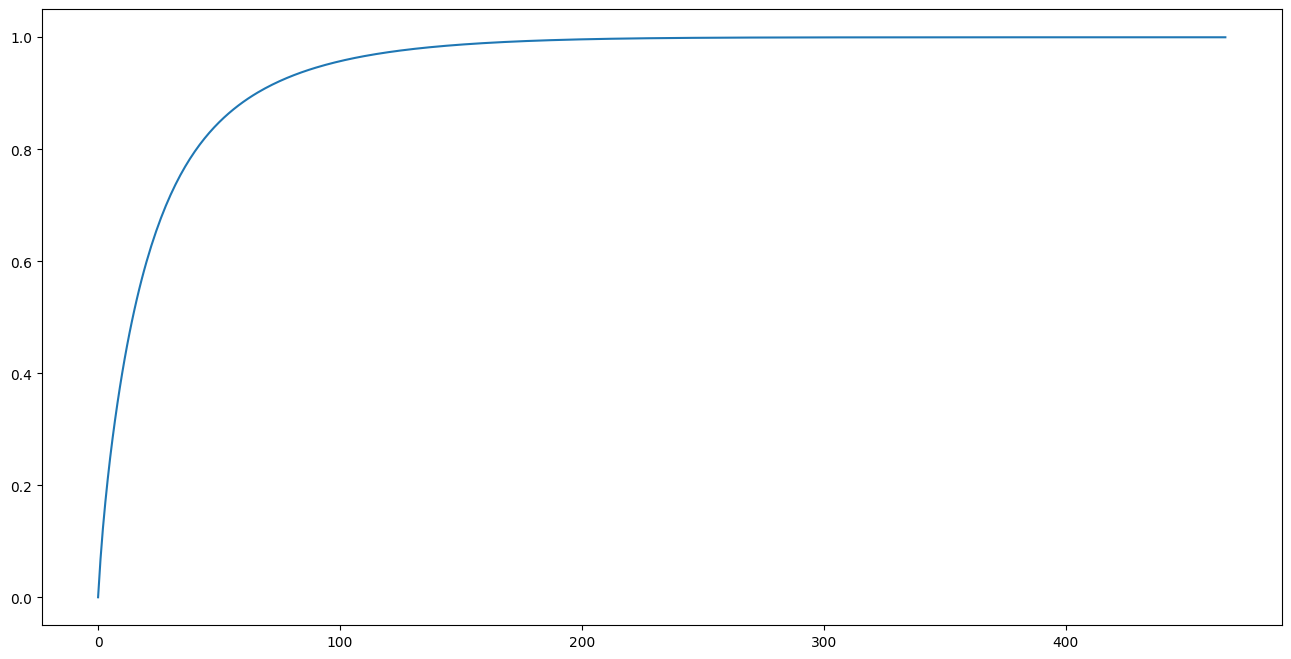

In [39]:
err_squared = np.square(np.array(err))
mis_var = [sum(err_squared[:i]) / sum(err_squared) for i in range(len(err_squared))]
plt.plot(mis_var)

# Es 4

In [40]:
i = 0
while sum(err_squared[:i]) / sum(err_squared) < 0.99: i += 1
print(f"We capture 99% of the variance with a rank {i} matrix")

We capture 99% of the variance with a rank 162 matrix


# Es 5

In [41]:
i = 0
while sum(err[:i]) / sum(err) < 0.99: i += 1
print(f"We capture 99% of the Frobenius norm with a rank {i} matrix")

i = 0
while sum(s[:i]) / sum(s) < 0.99: i += 1
print(f"We capture 99% of the singolar values with a rank {i} matrix")

We capture 99% of the Frobenius norm with a rank 326 matrix
We capture 99% of the singolar values with a rank 289 matrix
